# Using tensorflow wrapper on text8 corpus
[TensorFlow](https://www.tensorflow.org) is Google Brain's second generation machine learning system, 
with a reference implementation released as open source software on November 9, 2015. This tutorial will compare the time taken to train on gensim's word2vec implementation with TensorFlow's.
Before getting started you need to install [gensim](https://github.com/RaRe-Technologies/gensim/) and [setup Tensorflow](https://www.tensorflow.org/get_started/os_setup) to run with GPU support.
This wrapper has all the functionalities of the conventional word2vec of gensim. The notebook tutorial for the same can be found [here](https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/word2vec.ipynb).

# Training the model
We will be training the model using [text8](http://mattmahoney.net/dc/text8.zip)

In [20]:
%matplotlib inline 
import gensim
import os, time

from gensim.models.tfword2vec import TfWord2Vec
from gensim.models.word2vec import Word2Vec, Text8Corpus

import matplotlib.pyplot as plt

# Gensim benchmark
These benchmarks are conducted on Intel i7 6700K with hyper threading over-clocked to 4.4GHz. 

In [3]:
start = time.time()
corpus = Text8Corpus("text8")
model = Word2Vec(corpus, iter=1)
print "Gensim:\n" + str(time.time()-start)

Gensim:
13.9196498394


In [6]:
print(model)
print(model.wv.vocab)

Word2Vec(vocab=71290, size=100, alpha=0.025)
{u'fawn': <gensim.models.word2vec.Vocab object at 0x7f731fad7450>, u'homomorphism': <gensim.models.word2vec.Vocab object at 0x7f731f48c5d0>, u'nordisk': <gensim.models.word2vec.Vocab object at 0x7f73200d6590>, u'nunnery': <gensim.models.word2vec.Vocab object at 0x7f73217b2e90>, u'deferment': <gensim.models.word2vec.Vocab object at 0x7f731f87d4d0>, u'chthonic': <gensim.models.word2vec.Vocab object at 0x7f731f48c610>, u'sowell': <gensim.models.word2vec.Vocab object at 0x7f73217b20d0>, u'sonja': <gensim.models.word2vec.Vocab object at 0x7f731fad7490>, u'bioko': <gensim.models.word2vec.Vocab object at 0x7f731f281e90>, u'ginzburg': <gensim.models.word2vec.Vocab object at 0x7f731fad7810>, u'woods': <gensim.models.word2vec.Vocab object at 0x7f73217b2f10>, u'hsv': <gensim.models.word2vec.Vocab object at 0x7f731f3406d0>, u'spiders': <gensim.models.word2vec.Vocab object at 0x7f7321861650>, u'hanging': <gensim.models.word2vec.Vocab object at 0x7f731fad

# Benchmarking TensorFlow
Using the TensorFlow wrapper for gensim to train the model.

We are considering only one epoch i.e the number of training examples processed per step.
For varying batch sizes i.e the number of training examples each step processes we encounter different results.

In [36]:
batch_size = []
time_taken = []

In [37]:
size = 100
while size<=1000000:
    start = time.time()
    model = TfWord2Vec("text8", epochs_to_train=1, embedding_size=100, batch_size=size)
    batch_size.append(size)
    time_taken.append(time.time()-start)
    print("\nTensorflow:" + str(time_taken[-1]))
    print("Batch size:" + str(size) + "\n")
    size *= 10

Data file:  text8
Vocab size:  71290  + UNK
Words per epoch:  17005207
Epoch    1 Step   754893: lr = 0.006 words/sec =    29218
Tensorflow:108.839911938
Batch size:100

Data file:  text8
Vocab size:  71290  + UNK
Words per epoch:  17005207
Epoch    1 Step    75472: lr = 0.006 words/sec =   152860
Tensorflow:73.5875191689
Batch size:1000

Data file:  text8
Vocab size:  71290  + UNK
Words per epoch:  17005207
Epoch    1 Step     7536: lr = 0.006 words/sec =    56845
Tensorflow:69.1378400326
Batch size:10000

Data file:  text8
Vocab size:  71290  + UNK
Words per epoch:  17005207
Epoch    1 Step      742: lr = 0.006 words/sec =    96881
Tensorflow:68.650097847
Batch size:100000

Data file:  text8
Vocab size:  71290  + UNK
Words per epoch:  17005207
Epoch    1 Step       67: lr = 0.003 words/sec =   425701
Tensorflow:58.4717719555
Batch size:1000000



[108.83991193771362, 73.58751916885376, 69.13784003257751, 68.65009784698486, 58.47177195549011]
[100, 1000, 10000, 100000, 1000000]


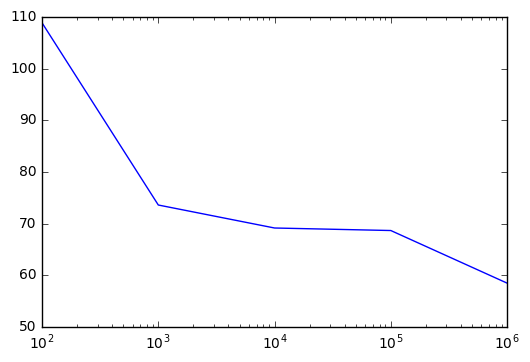

In [38]:
plt.xscale('log', nonposy='clip')
plt.plot(batch_size, time_taken)
print(time_taken)
print(batch_size)

Note how the time taken decreases drastically with increasing batch size.